<a href="https://colab.research.google.com/github/brunaruppruela/mestrado_IFES_IA/blob/main/GeneticAlgorithm_8Queens_BRUNARUPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste de implementação em phyton do Algoritmo Genético.
Obs.:

# Algoritmo Genético
## Para o problema das 8 rainhas

## Importações

In [2]:
# Manipulação de dados
import numpy as np
#import pandas as pd

# Geração de números aleatórios
import random

In [3]:
#VT = np.array([4,8,2,7,3,1,5,6])
VT = np.array([4,8,2,7,3,7,5,4])

VT

array([4, 8, 2, 7, 3, 7, 5, 4])

## Funções Auxiliares - Problema

### Converte Vetor em Tabuleiro

In [4]:
def converte_tabuleiro(VT):
    '''
    Recebe um vetor representando um tabuleiro
    com N rainhas, uma por coluna e retorna
    uma lista de lista de 0 e 1 representando
    um tabuleiro com as rainhas.
    '''
    N = len(VT)

    L = [0]*N
    T = []
    for i in range(N):
        T += [L.copy()]

    for lin in range(N):
        for col in range(N):
            if lin+1 == VT[col]:
                T[lin][col] = 1

    return T

In [5]:
converte_tabuleiro(VT)

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0]]

### Calcula custo (Fitness)

In [6]:
def __conta_ataques_linhas(VT):
    '''
    Função que recebe um Vetor-Tabuleiro e
    retorna o número de pares de rainhas se
    atacando mutuamente nas linhas.
    '''
    ataques = 0
    N = len(VT)
    for col1 in range(N):
        lin1 = VT[col1]
        for col2 in range(col1+1, N):
            lin2 = VT[col2]
            if lin1==lin2:
                ataques +=1

    return ataques

In [7]:
__conta_ataques_linhas(VT)

2

In [8]:
def __conta_ataques_diagonais(VT):
    '''
    Função que recebe um Vetor-Tabuleiro e
    retorna o número de pares de rainhas se
    atacando mutuamente nas diagonais.
    '''
    ataques = 0
    N = len(VT)

    for col1 in range(N):
        lin1 = VT[col1]
        for col2 in range(col1+1, N):
            lin2 = VT[col2]

            # diferenças entre as linhas e colunas
            d1 = lin1-col1
            d2 = lin2-col2

            # somas das linhas e colunas
            s1 = lin1+col1
            s2 = lin2+col2

            # condições para ataques nas diagonais
            if d1==d2 or s1==s2:
                ataques +=1
                #print(f'({lin1},{col1+1}) ({lin2},{col2+1}) -->', ataques,
                #      '<--', f'  -({d1:2},{d2:2})  +({s1:2},{s2:2})')

    return ataques

In [9]:
converte_tabuleiro(VT)

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0]]

In [10]:
__conta_ataques_diagonais(VT)

4

In [11]:
def conta_ataques(VT):
    '''
    Função que recebe um Vetor-Tabuleiro e
    retorna o número de pares de rainhas se
    atacando mutuamente nas linhas e diagonais.
    '''
    ataques  = __conta_ataques_linhas(VT)

    ataques += __conta_ataques_diagonais(VT)

    return ataques

In [12]:
VT = [1,2,3,4,5,6,7,8]

In [13]:
conta_ataques(VT)

28

### Gera vizinhos

In [14]:
def gera_vizinhos(VT):
    '''
    Gera todos os vizinhos possíveis,
    variando uma rainha de cada vez.
    '''
    N = len(VT)
    for col in range(N):
        for lin in range(N):
            # se nao existe rainha naquela linha,
            # entao gera estado vizinho.
            linha = lin+1
            if linha != VT[col]:
                vizinho   = VT.copy()
                vizinho[col] = linha

                yield vizinho


### Gera tuplas custos

In [15]:
def gera_tuplas_custos(Populacao):
    '''
    Gera tuplas com os custos de todos os individuos da populacao.
    '''
    TuplasCustos = []
    for individuo in Populacao:
        ataques = conta_ataques(individuo)

        TuplasCustos += [(ataques, individuo)]

    return TuplasCustos


In [16]:
Populacao = gera_vizinhos(VT)
Tuplas = gera_tuplas_custos(Populacao)
Tuplas

[(22, [2, 2, 3, 4, 5, 6, 7, 8]),
 (23, [3, 2, 3, 4, 5, 6, 7, 8]),
 (22, [4, 2, 3, 4, 5, 6, 7, 8]),
 (23, [5, 2, 3, 4, 5, 6, 7, 8]),
 (22, [6, 2, 3, 4, 5, 6, 7, 8]),
 (23, [7, 2, 3, 4, 5, 6, 7, 8]),
 (22, [8, 2, 3, 4, 5, 6, 7, 8]),
 (22, [1, 1, 3, 4, 5, 6, 7, 8]),
 (22, [1, 3, 3, 4, 5, 6, 7, 8]),
 (23, [1, 4, 3, 4, 5, 6, 7, 8]),
 (22, [1, 5, 3, 4, 5, 6, 7, 8]),
 (23, [1, 6, 3, 4, 5, 6, 7, 8]),
 (22, [1, 7, 3, 4, 5, 6, 7, 8]),
 (23, [1, 8, 3, 4, 5, 6, 7, 8]),
 (23, [1, 2, 1, 4, 5, 6, 7, 8]),
 (22, [1, 2, 2, 4, 5, 6, 7, 8]),
 (22, [1, 2, 4, 4, 5, 6, 7, 8]),
 (23, [1, 2, 5, 4, 5, 6, 7, 8]),
 (22, [1, 2, 6, 4, 5, 6, 7, 8]),
 (23, [1, 2, 7, 4, 5, 6, 7, 8]),
 (22, [1, 2, 8, 4, 5, 6, 7, 8]),
 (22, [1, 2, 3, 1, 5, 6, 7, 8]),
 (23, [1, 2, 3, 2, 5, 6, 7, 8]),
 (22, [1, 2, 3, 3, 5, 6, 7, 8]),
 (22, [1, 2, 3, 5, 5, 6, 7, 8]),
 (23, [1, 2, 3, 6, 5, 6, 7, 8]),
 (22, [1, 2, 3, 7, 5, 6, 7, 8]),
 (23, [1, 2, 3, 8, 5, 6, 7, 8]),
 (23, [1, 2, 3, 4, 1, 6, 7, 8]),
 (22, [1, 2, 3, 4, 2, 6, 7, 8]),
 (23, [1, 

In [17]:
sorted(Tuplas, key=lambda k: k[0])

[(22, [2, 2, 3, 4, 5, 6, 7, 8]),
 (22, [4, 2, 3, 4, 5, 6, 7, 8]),
 (22, [6, 2, 3, 4, 5, 6, 7, 8]),
 (22, [8, 2, 3, 4, 5, 6, 7, 8]),
 (22, [1, 1, 3, 4, 5, 6, 7, 8]),
 (22, [1, 3, 3, 4, 5, 6, 7, 8]),
 (22, [1, 5, 3, 4, 5, 6, 7, 8]),
 (22, [1, 7, 3, 4, 5, 6, 7, 8]),
 (22, [1, 2, 2, 4, 5, 6, 7, 8]),
 (22, [1, 2, 4, 4, 5, 6, 7, 8]),
 (22, [1, 2, 6, 4, 5, 6, 7, 8]),
 (22, [1, 2, 8, 4, 5, 6, 7, 8]),
 (22, [1, 2, 3, 1, 5, 6, 7, 8]),
 (22, [1, 2, 3, 3, 5, 6, 7, 8]),
 (22, [1, 2, 3, 5, 5, 6, 7, 8]),
 (22, [1, 2, 3, 7, 5, 6, 7, 8]),
 (22, [1, 2, 3, 4, 2, 6, 7, 8]),
 (22, [1, 2, 3, 4, 4, 6, 7, 8]),
 (22, [1, 2, 3, 4, 6, 6, 7, 8]),
 (22, [1, 2, 3, 4, 8, 6, 7, 8]),
 (22, [1, 2, 3, 4, 5, 1, 7, 8]),
 (22, [1, 2, 3, 4, 5, 3, 7, 8]),
 (22, [1, 2, 3, 4, 5, 5, 7, 8]),
 (22, [1, 2, 3, 4, 5, 7, 7, 8]),
 (22, [1, 2, 3, 4, 5, 6, 2, 8]),
 (22, [1, 2, 3, 4, 5, 6, 4, 8]),
 (22, [1, 2, 3, 4, 5, 6, 6, 8]),
 (22, [1, 2, 3, 4, 5, 6, 8, 8]),
 (22, [1, 2, 3, 4, 5, 6, 7, 1]),
 (22, [1, 2, 3, 4, 5, 6, 7, 3]),
 (22, [1, 

## Funções Auxiliares - AG

### Mutação

In [18]:
def mutacao(VT, p_mutacao=0.20):

    VT_mutated = VT.copy()

    N = len(VT)
    p = np.random.rand()

    if p < p_mutacao:
        col   = np.random.randint(0,N)    # indice da coluna (base-0)
        linha = np.random.randint(1,N+1)  # valor da linha   (base-1)

        VT_mutated[col] = linha
        #print(col+1, linha)

    return VT_mutated

In [19]:
VT

[1, 2, 3, 4, 5, 6, 7, 8]

In [20]:
VT2 = mutacao(VT)
VT, VT2, VT != VT2

([1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8], False)

### Crossover

In [21]:
def crossover2(Parent1, Parent2):

    N =  len(Parent1)

    # ponto de corte
    c = np.random.randint(1, N-1)

    # crossover no ponto de corte
    # gerando dois filhos
    child1 = Parent1[:c] + Parent2[c:]      # Python List format
    child2 = Parent2[:c] + Parent1[c:]      # Python List format

    return child1, child2

In [22]:
# ALTERNATIVAMENTE, VOCÊ PODE GERAR TAMBÉM
# UMA FUNÇÃO CROSSOVER QUE GERA APENAS UM FILHO
#
def crossover1(Parent1, Parent2):

    N = len(Parent1)

    # ponto de corte
    c = np.random.randint(1, N-1)

    # crossover no ponto de corte
    # gerando dois filhos
    child1[:c] = Parent1[:c]        # NUMPY format
    child1[c:] = Parent2[c:]        # NUMPY format

    return child1

In [34]:
VT1 = [1,1,1,1,1,1,1,1]
VT2 = [2,2,2,2,2,2,2,2]

In [35]:
crossover2(VT1, VT2)

([1, 1, 1, 1, 2, 2, 2, 2], [2, 2, 2, 2, 1, 1, 1, 1])

### Seleciona pais

In [25]:

# Selecao por torneio
def selecao(Populacao):
    Candidato1 = random.choice(Populacao)
    Candidato2 = random.choice(Populacao)

    a1 = conta_ataques(Candidato1)
    a2 = conta_ataques(Candidato2)
    #print(a1,a2)

    # eleito o candidato com menor custo
    eleito = Candidato1 if a1<=a2 else Candidato2

    return eleito

In [36]:

selecao([VT1,VT2])

[2, 2, 2, 2, 2, 2, 2, 2]

### Gera Indivíduo

In [27]:
def gera_individuo(n_cols):
    # individuo é um Vetor (N) em que cada posicação
    # representa uma coluna indicando as respectivas
    # linhas ocupadas pelas rainhas em um tabuleiro (NxN).

    # VT = [low, high) x n_cols

    VT = np.random.randint(low=1, high=n_cols+1, size=n_cols)
    return VT

In [28]:
N=8
gera_individuo(N)

array([6, 6, 7, 5, 7, 4, 1, 1])

### Gera População

In [29]:
def gera_populacao_inicial(N, tam_pop):
    # N:       tamanho do tabuleiro (NxN)
    # tam_pop: tamanho da população
    populacao = []
    for _ in range(tam_pop):
        individuo = gera_individuo(N)

        populacao.append(individuo)

    return populacao

In [30]:
N = 8
tam_pop = 20
Populacao = gera_populacao_inicial(N, tam_pop)
Populacao

[array([5, 6, 8, 2, 8, 2, 5, 2]),
 array([7, 8, 4, 1, 7, 3, 2, 1]),
 array([5, 7, 7, 3, 7, 7, 5, 1]),
 array([2, 7, 4, 7, 1, 2, 8, 1]),
 array([6, 3, 2, 6, 2, 8, 8, 5]),
 array([8, 8, 1, 6, 7, 5, 4, 5]),
 array([5, 8, 6, 3, 3, 6, 6, 2]),
 array([1, 7, 7, 7, 8, 1, 3, 6]),
 array([2, 2, 2, 5, 1, 2, 7, 1]),
 array([8, 8, 8, 8, 2, 4, 3, 2]),
 array([2, 4, 2, 1, 3, 4, 2, 1]),
 array([6, 7, 5, 8, 7, 4, 7, 6]),
 array([8, 1, 4, 7, 2, 6, 7, 4]),
 array([3, 2, 8, 1, 5, 2, 4, 8]),
 array([5, 8, 2, 5, 5, 3, 7, 3]),
 array([7, 1, 2, 4, 4, 2, 2, 3]),
 array([8, 7, 6, 5, 5, 3, 2, 8]),
 array([3, 4, 6, 1, 2, 8, 7, 4]),
 array([6, 5, 3, 1, 8, 3, 5, 2]),
 array([2, 7, 2, 8, 3, 7, 5, 6])]

In [31]:
gera_tuplas_custos(Populacao)


[(9, array([5, 6, 8, 2, 8, 2, 5, 2])),
 (7, array([7, 8, 4, 1, 7, 3, 2, 1])),
 (10, array([5, 7, 7, 3, 7, 7, 5, 1])),
 (8, array([2, 7, 4, 7, 1, 2, 8, 1])),
 (8, array([6, 3, 2, 6, 2, 8, 8, 5])),
 (6, array([8, 8, 1, 6, 7, 5, 4, 5])),
 (6, array([5, 8, 6, 3, 3, 6, 6, 2])),
 (6, array([1, 7, 7, 7, 8, 1, 3, 6])),
 (11, array([2, 2, 2, 5, 1, 2, 7, 1])),
 (13, array([8, 8, 8, 8, 2, 4, 3, 2])),
 (8, array([2, 4, 2, 1, 3, 4, 2, 1])),
 (9, array([6, 7, 5, 8, 7, 4, 7, 6])),
 (5, array([8, 1, 4, 7, 2, 6, 7, 4])),
 (8, array([3, 2, 8, 1, 5, 2, 4, 8])),
 (7, array([5, 8, 2, 5, 5, 3, 7, 3])),
 (12, array([7, 1, 2, 4, 4, 2, 2, 3])),
 (18, array([8, 7, 6, 5, 5, 3, 2, 8])),
 (6, array([3, 4, 6, 1, 2, 8, 7, 4])),
 (5, array([6, 5, 3, 1, 8, 3, 5, 2])),
 (7, array([2, 7, 2, 8, 3, 7, 5, 6]))]

## Algoritmo Genético - Implementação

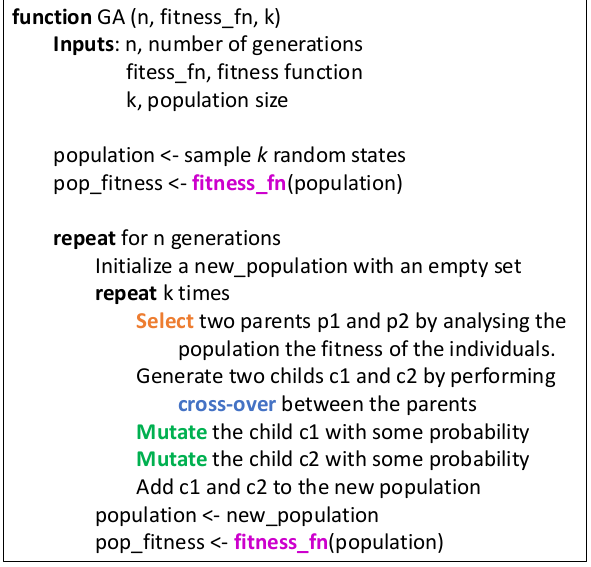


In [32]:
# 1) Randomly initialize populations p
# 2) Compute fitness of population
# 3) Until convergence repeat:
#       a) Select parents from population
#       b) Crossover and generate new population
#       c) Perform mutation on new population with some probability
# 4) Calculate fitness for new population

In [62]:
def algoritmo_genetico():
    # pseudo-código:

    # START
    N = 8
    tam_pop = 20
    num_geracoes = 100


    # Generate the initial population
    Populacao = gera_populacao_inicial(N, tam_pop)

    fitness = gera_tuplas_custos(Populacao) # função fitness

    # Compute fitness - apenas em caso de elitismo
    #custosPopulacao = fitness(Populacao)

    # REPEAT
    for g in range(num_geracoes):
        NovaPopulacao = []
        TuplasCustos = gera_tuplas_custos(Populacao)

        for i in range(tam_pop):

            #     Selection
            p1 = selecao(Populacao)
            p2 = selecao(Populacao)
            #     Crossover
            c1, c2 = crossover2(p1, p2)
            #     Mutation
            c1 = mutacao(c1, p_mutacao=0.20)
            c2 = mutacao(c2, p_mutacao=0.20)
            #     Compute fitness
            # Adiciona os novos indivíduos à nova população
            NovaPopulacao.append(c1)
            NovaPopulacao.append(c2)
            #

        # A nova população substitui a antiga
        Populacao = NovaPopulacao
        TuplasCustos = gera_tuplas_custos(Populacao)



In [63]:
# Execução
melhor_vetor = algoritmo_genetico()
print(melhor_vetor)

ValueError: operands could not be broadcast together with shapes (2,) (6,) 